In [1]:
%pylab inline
!pip install JSAnimation
import math

Populating the interactive namespace from numpy and matplotlib
Defaulting to user installation because normal site-packages is not writeable


In [41]:
is_hit = False

def sense(x):
    return x

def simulate(Δt, x, u):
    global is_hit
    if is_hit == True:
        is_hit = False
        x[3] = -x[3] + u[3]*Δt
    x += Δt * u
    return x

def control(Δt, y):
    global is_hit
    uz = y[3]
    az = -9.8
    if y[1] <= 0:
        is_hit = True
        uz = -uz
    return array([0, uz, 0, az])



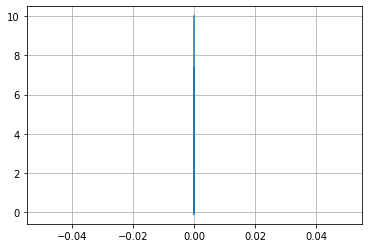

In [42]:
tf = 5.
Δt = 0.01
time = linspace(0., tf, int(tf / Δt) + 1)

robot = array([0., 10., 0., 0.])
robot_log = [copy(robot)]

for t in time:
    robot_sense = sense(robot)
    velocity = control(Δt, robot_sense)
    robot = simulate(Δt, robot, velocity)
    robot_log.append(copy(robot))

robot_log = array(robot_log)

grid()
plot(robot_log[:,0], robot_log[:,1])



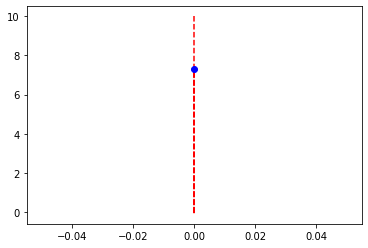

In [43]:


import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(robot_log[:,0], robot_log[:,1], 'r--')
    
    # Initial conditions
    plot(robot_log[t,0], robot_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=10)

HTML(anim.to_jshtml())

